# Objetivo: Misturar as tecnicas  PCA e ACM com objetivo final de formar Clusters

In [1]:
#Pacotes
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

# Banco de dados 

In [2]:
#Base de dados
dados = pd.read_csv('base_dados.csv',encoding='latin-1')
dados = dados.set_index('estudante')
dados

,notas_financas,notas_custos,notas_marketing,notas_atuarias,perfil,aplicacao,estado_civil
estudante,,,,,,,
Gabriela,5.8,4.00,1.00,6.0,Conservador,Poupanca,Casado
Luiz Felipe,3.1,3.00,10.00,2.0,Conservador,Poupanca,Casado
Patrícia,3.1,4.00,4.00,4.0,Conservador,Poupanca,Casado
Gustavo,10.0,8.00,8.00,8.0,Conservador,Poupanca,Solteiro
Letícia,3.4,2.00,3.20,3.2,Conservador,Poupanca,Casado
...,...,...,...,...,...,...,...
Sheila,7.7,4.33,5.16,5.1,Agressivo,Acoes,Solteiro
Pedro,9.0,6.00,4.00,9.8,Agressivo,Acoes,Solteiro
Horácio,9.3,6.00,7.00,7.0,Agressivo,Acoes,Solteiro


**Tabela com 100 observações e 7 variáveis**

## Analise da variáveis Categóricas para criar uma ACM

In [3]:
#Labels
print(dados.perfil.unique())
print(dados.aplicacao.unique())
print(dados.estado_civil.unique())

['Conservador' 'Moderado' 'Agressivo']
['Poupanca' 'CDB' 'Acoes']
['Casado' 'Solteiro']


**Nome das labels de cada variável**

## Tabela de Contingências 

**Na ACM não há como se estabelecer uma única tabela de contingência que abranja todas as variáveis presentes na base de dados, temos que criar as tabelas de contingencias duas em duas e fazer o estudo do Qui-Quadrado de cada tabela**

In [4]:
# Perfil x Aplicação
tab_cont_PA = pd.crosstab(dados.perfil,dados.aplicacao,margins=True)
tab_cont_PA

aplicacao,Acoes,CDB,Poupanca,All
perfil,,,,
Agressivo,36,20,2,58
Conservador,5,4,8,17
Moderado,4,16,5,25
All,45,40,15,100


In [5]:
# Perfil x Estado Civil
tab_cont_PE = pd.crosstab(dados.perfil,dados.estado_civil,margins=True)
tab_cont_PE

estado_civil,Casado,Solteiro,All
perfil,,,
Agressivo,17,41,58
Conservador,12,5,17
Moderado,14,11,25
All,43,57,100


In [6]:
# Aplicação x Estado Civil
tab_cont_AE = pd.crosstab(dados.aplicacao,dados.estado_civil,margins=True)
tab_cont_AE

estado_civil,Casado,Solteiro,All
aplicacao,,,
Acoes,9,36,45
CDB,24,16,40
Poupanca,10,5,15
All,43,57,100


## Estudo do Qui-Quadrado de cada tabela de contingências

In [7]:
#Teste chi² (Perfil x Aplicação)
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tab_cont_PA)
pvalor

0.0002187073702990959

In [8]:
#Teste chi² (Perfil x Estado Civil)
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tab_cont_PE)
pvalor

0.07575848845254271

In [9]:
#Teste chi² (Aplicação x Estado Civil)
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tab_cont_AE)
pvalor

0.006600580473427465

**Como os P_valores foram todos menores que 0.05 concluímos que, as duas variáveis categóricas de cada tabela de contingencia não se associam de forma aleatória, portanto, há ACM**

# Matriz Binária(Z) 

**Matriz Binária(Z) se assemelha a tabela de contingencia em uma ANACOR, conseguimos extrair as coordenadas(consideradas variáveis metricas) das observações e das variáveis, sendo assim , podemos estudar associações entre categorias e as associações das observações em razão dessas categorias**

In [10]:
#Matriz Binária(Z)
matriz_binaria = pd.get_dummies(dados.iloc[:,4:])
matriz_binaria

,perfil_Agressivo,perfil_Conservador,perfil_Moderado,aplicacao_Acoes,aplicacao_CDB,aplicacao_Poupanca,estado_civil_Casado,estado_civil_Solteiro
estudante,,,,,,,,
Gabriela,0,1,0,0,0,1,1,0
Luiz Felipe,0,1,0,0,0,1,1,0
Patrícia,0,1,0,0,0,1,1,0
Gustavo,0,1,0,0,0,1,0,1
Letícia,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
Sheila,1,0,0,1,0,0,0,1
Pedro,1,0,0,1,0,0,0,1
Horácio,1,0,0,1,0,0,0,1


In [11]:
import prince
# Criando o modelo ACM com a Matriz Binaria

# Num. de dimensões necessarias para analise
J = len(matriz_binaria.columns)
Q = len(dados.iloc[:,4:].columns)# Somente das variáveis categoricas
dim = J - Q
dim
#Modelo
IPT_binaria = prince.CA(n_components=dim)
IPT_binaria.fit(matriz_binaria);

#Inercia principal total da matriz de Burt decomposta
np.divide(IPT_binaria.eigenvalues_,sum(IPT_binaria.eigenvalues_))

array([0.36138271, 0.26159269, 0.16588365, 0.10790224, 0.1032387 ])

In [12]:
#Coordenadas das observações da matriz binaria
coo_bin = pd.DataFrame(IPT_binaria.row_coordinates(matriz_binaria))
coo_bin.columns = ['Dim1','Dim2','Dim3','Dim4','Dim5']
coo_bin

,Dim1,Dim2,Dim3,Dim4,Dim5
Gabriela,1.440751,1.354770,-0.080773,0.000922,0.201271
Luiz Felipe,1.440751,1.354770,-0.080773,0.000922,0.201271
Patrícia,1.440751,1.354770,-0.080773,0.000922,0.201271
Gustavo,0.805403,1.470920,0.520548,0.747892,0.353852
Letícia,1.440751,1.354770,-0.080773,0.000922,0.201271
...,...,...,...,...,...
Sheila,-0.910729,0.238135,0.077910,-0.087323,-0.020420
Pedro,-0.910729,0.238135,0.077910,-0.087323,-0.020420
Horácio,-0.910729,0.238135,0.077910,-0.087323,-0.020420
Leandro,-0.910729,0.238135,0.077910,-0.087323,-0.020420


In [13]:
#Excluir as variáveis categoricas
dados = dados.iloc[:,0:4]

#Join com a tabela original
dados[['Dim1','Dim2','Dim3','Dim4','Dim5']] = coo_bin
dados

,notas_financas,notas_custos,notas_marketing,notas_atuarias,Dim1,Dim2,Dim3,Dim4,Dim5
estudante,,,,,,,,,
Gabriela,5.8,4.00,1.00,6.0,1.440751,1.354770,-0.080773,0.000922,0.201271
Luiz Felipe,3.1,3.00,10.00,2.0,1.440751,1.354770,-0.080773,0.000922,0.201271
Patrícia,3.1,4.00,4.00,4.0,1.440751,1.354770,-0.080773,0.000922,0.201271
Gustavo,10.0,8.00,8.00,8.0,0.805403,1.470920,0.520548,0.747892,0.353852
Letícia,3.4,2.00,3.20,3.2,1.440751,1.354770,-0.080773,0.000922,0.201271
...,...,...,...,...,...,...,...,...,...
Sheila,7.7,4.33,5.16,5.1,-0.910729,0.238135,0.077910,-0.087323,-0.020420
Pedro,9.0,6.00,4.00,9.8,-0.910729,0.238135,0.077910,-0.087323,-0.020420
Horácio,9.3,6.00,7.00,7.0,-0.910729,0.238135,0.077910,-0.087323,-0.020420


**Como extraimos as variáveis metricas através das variáveis categoricas, não faz mais sentido ter as variáveis categoricas**

## Analise da variáveis Numéricas para criar uma PCA

<AxesSubplot:>

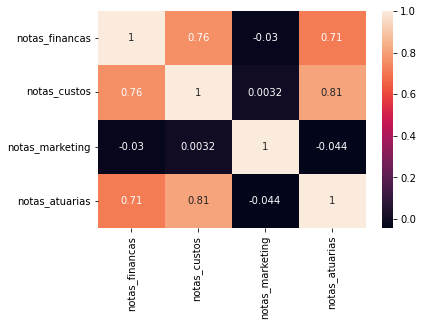

In [14]:
### Matriz de correlação
#Matriz
import seaborn as sns
sns.heatmap(dados.iloc[:,0:4].corr(),annot = True)

## Teste de esfericidade de Bartlett

In [15]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(dados.iloc[:,0:4])
print('Teste da Esfericidade de Bartlett: chi² = %d,  p_value = %d' % (chi_square_value, p_value))

Teste da Esfericidade de Bartlett: chi² = 196,  p_value = 0


**P_value < 0.05, portanto a correlação entre os dados é estatisticamente diferente de 0, rejeita-se a hipótese nula**

## AutoValores e AutoVetores

In [16]:
#Calculo dos Autovalore e Autovetores
(auto_valores,auto_vetores) = np.linalg.eig(dados.iloc[:,0:4].corr())


In [17]:
#Auto Valores
auto_valores

array([2.51905266, 0.29773206, 0.18280721, 1.00040807])

In [18]:
#Auto vetores(Colocar em ordem)
Aut_vet = pd.DataFrame(auto_vetores,columns=['PC1','PC3','PC4','PC2'])
Aut_vet['Notas'] = dados.iloc[:,0:4].columns.values
Aut_vet = Aut_vet.set_index('Notas')
nova_ordem = ['PC1','PC2','PC3','PC4']
Aut_vet = Aut_vet[nova_ordem]
Aut_vet

,PC1,PC2,PC3,PC4
Notas,,,,
notas_financas,-0.564124,0.006728,-0.800695,-0.201511
notas_custos,-0.588711,0.048746,0.219796,0.776359
notas_marketing,0.026629,0.998737,0.000356,-0.042616
notas_atuarias,-0.578338,-0.010196,0.557294,-0.595688


## Scores Fatoriais

In [19]:
#Numero de cada variáveis capturadas por componentes
Aut_vet['PC1'] = Aut_vet.iloc[:,0]*-1
Aut_vet = Aut_vet.T
Aut_vet

Notas,notas_financas,notas_custos,notas_marketing,notas_atuarias
PC1,0.564124,0.588711,-0.026629,0.578338
PC2,0.006728,0.048746,0.998737,-0.010196
PC3,-0.800695,0.219796,0.000356,0.557294
PC4,-0.201511,0.776359,-0.042616,-0.595688


In [20]:
#Auto Vetores (Multiplicar por -1 o primeiro Componente)
Aut_vet = Aut_vet.T
Aut_vet

,PC1,PC2,PC3,PC4
Notas,,,,
notas_financas,0.564124,0.006728,-0.800695,-0.201511
notas_custos,0.588711,0.048746,0.219796,0.776359
notas_marketing,-0.026629,0.998737,0.000356,-0.042616
notas_atuarias,0.578338,-0.010196,0.557294,-0.595688


**Dependendo do seu objetivo, precisa mudar o sinal dos dados das variáveis, neste caso as notas dos alunos tem que ser positivos entre todas as outras variáveis**

## Fatores

In [21]:
#Normalizar os dados
from sklearn.preprocessing import StandardScaler
dados_norm = StandardScaler().fit(dados)
dados_norm = pd.DataFrame(dados_norm.transform(dados),columns=dados.columns)
dados_norm.index = dados.index
dados_norm.head()

,notas_financas,notas_custos,notas_marketing,notas_atuarias,Dim1,Dim2,Dim3,Dim4,Dim5
estudante,,,,,,,,,
Gabriela,-0.010943,-0.292100,-1.658407,0.274347,1.85644,2.051768,-0.153616,0.002174,0.485217
Luiz Felipe,-0.879921,-0.700974,1.539447,-1.325345,1.85644,2.051768,-0.153616,0.002174,0.485217
Patrícia,-0.879921,-0.292100,-0.592456,-0.525499,1.85644,2.051768,-0.153616,0.002174,0.485217
Gustavo,1.340802,1.343398,0.828813,1.074193,1.03778,2.227675,0.989998,1.763596,0.853052
Letícia,-0.783368,-1.109849,-0.876710,-0.845437,1.85644,2.051768,-0.153616,0.002174,0.485217


In [22]:
#Numero total de variáveis capturadas por componentes
m = pd.DataFrame(sorted(auto_valores,reverse=True))
m = np.sqrt(m)
m

,0
0,1.587152
1,1.000204
2,0.545648
3,0.427560


In [23]:
#Score fatorial das variáveis

Aut_vet = Aut_vet.T
calsco_fat = Aut_vet/m.values

calsco_fat

Notas,notas_financas,notas_custos,notas_marketing,notas_atuarias
PC1,0.355431,0.370923,-0.016778,0.364387
PC2,0.006726,0.048736,0.998533,-0.010194
PC3,-1.467420,0.402816,0.000652,1.021343
PC4,-0.471304,1.815791,-0.099673,-1.393229


In [24]:
#Fatores (Score Fatorial X Dados Padronizados)
score_fat1 = pd.DataFrame(np.dot(dados_norm.iloc[:,0:4].values, calsco_fat.T.values),columns=['FT1','FT2','FT3','FT4'])
score_fat1['Estudantes'] = dados.index
score_fat1 = score_fat1.set_index('Estudantes')
score_fat1

,FT1,FT2,FT3,FT4
Estudantes,,,,
Gabriela,0.015557,-1.673080,0.177517,-0.742165
Luiz Felipe,-1.081527,1.510618,-0.343779,0.834955
Patrícia,-0.602643,-0.606384,0.636451,0.675510
Gustavo,1.352376,0.891137,-0.328718,0.228197
Letícia,-0.983459,-0.926163,-0.161587,-0.380777
...,...,...,...,...
Sheila,0.126999,-0.182771,-1.032114,-0.431230
Pedro,1.220815,-0.577404,0.548461,-1.966247
Horácio,0.829214,0.499049,-0.736214,-0.557884


In [25]:
#Selecionar os 2 principais Fatores
score_fat1 = score_fat1.iloc[:,0:2]
score_fat1

,FT1,FT2
Estudantes,,
Gabriela,0.015557,-1.673080
Luiz Felipe,-1.081527,1.510618
Patrícia,-0.602643,-0.606384
Gustavo,1.352376,0.891137
Letícia,-0.983459,-0.926163
...,...,...
Sheila,0.126999,-0.182771
Pedro,1.220815,-0.577404
Horácio,0.829214,0.499049


In [26]:
import warnings
warnings.filterwarnings('ignore')
#Excluir as variáveis Numericas Originais
dados = dados.iloc[:,4:]

#Join com a tabela original
dados[['F1','F2']] = score_fat1
dados

,Dim1,Dim2,Dim3,Dim4,Dim5,F1,F2
estudante,,,,,,,
Gabriela,1.440751,1.354770,-0.080773,0.000922,0.201271,0.015557,-1.673080
Luiz Felipe,1.440751,1.354770,-0.080773,0.000922,0.201271,-1.081527,1.510618
Patrícia,1.440751,1.354770,-0.080773,0.000922,0.201271,-0.602643,-0.606384
Gustavo,0.805403,1.470920,0.520548,0.747892,0.353852,1.352376,0.891137
Letícia,1.440751,1.354770,-0.080773,0.000922,0.201271,-0.983459,-0.926163
...,...,...,...,...,...,...,...
Sheila,-0.910729,0.238135,0.077910,-0.087323,-0.020420,0.126999,-0.182771
Pedro,-0.910729,0.238135,0.077910,-0.087323,-0.020420,1.220815,-0.577404
Horácio,-0.910729,0.238135,0.077910,-0.087323,-0.020420,0.829214,0.499049


**Como extraimos a PCA através das variáveis Numericas, não faz mais sentido manter as variáveis numericas originais**

## Estabelecendo a Clusterização

In [27]:
#Normalizar os dados
from sklearn.preprocessing import StandardScaler
dados_norm = StandardScaler().fit(dados)
dados_norm = pd.DataFrame(dados_norm.transform(dados),columns=dados.columns)
dados_norm.index = dados.index
dados_norm

,Dim1,Dim2,Dim3,Dim4,Dim5,F1,F2
estudante,,,,,,,
Gabriela,1.856440,2.051768,-0.153616,0.002174,0.485217,0.015557,-1.673080
Luiz Felipe,1.856440,2.051768,-0.153616,0.002174,0.485217,-1.081527,1.510618
Patrícia,1.856440,2.051768,-0.153616,0.002174,0.485217,-0.602643,-0.606384
Gustavo,1.037780,2.227675,0.989998,1.763596,0.853052,1.352376,0.891137
Letícia,1.856440,2.051768,-0.153616,0.002174,0.485217,-0.983459,-0.926163
...,...,...,...,...,...,...,...
Sheila,-1.173495,0.360650,0.148172,-0.205916,-0.049228,0.126999,-0.182771
Pedro,-1.173495,0.360650,0.148172,-0.205916,-0.049228,1.220815,-0.577404
Horácio,-1.173495,0.360650,0.148172,-0.205916,-0.049228,0.829214,0.499049


In [28]:
from sklearn.cluster import KMeans
fitted_ = KMeans(n_clusters=2,max_iter=500).fit(dados_norm)
dados_norm['Labels']  = fitted_.labels_
dados_norm

,Dim1,Dim2,Dim3,Dim4,Dim5,F1,F2,Labels
estudante,,,,,,,,
Gabriela,1.856440,2.051768,-0.153616,0.002174,0.485217,0.015557,-1.673080,1
Luiz Felipe,1.856440,2.051768,-0.153616,0.002174,0.485217,-1.081527,1.510618,1
Patrícia,1.856440,2.051768,-0.153616,0.002174,0.485217,-0.602643,-0.606384,1
Gustavo,1.037780,2.227675,0.989998,1.763596,0.853052,1.352376,0.891137,1
Letícia,1.856440,2.051768,-0.153616,0.002174,0.485217,-0.983459,-0.926163,1
...,...,...,...,...,...,...,...,...
Sheila,-1.173495,0.360650,0.148172,-0.205916,-0.049228,0.126999,-0.182771,0
Pedro,-1.173495,0.360650,0.148172,-0.205916,-0.049228,1.220815,-0.577404,0
Horácio,-1.173495,0.360650,0.148172,-0.205916,-0.049228,0.829214,0.499049,0


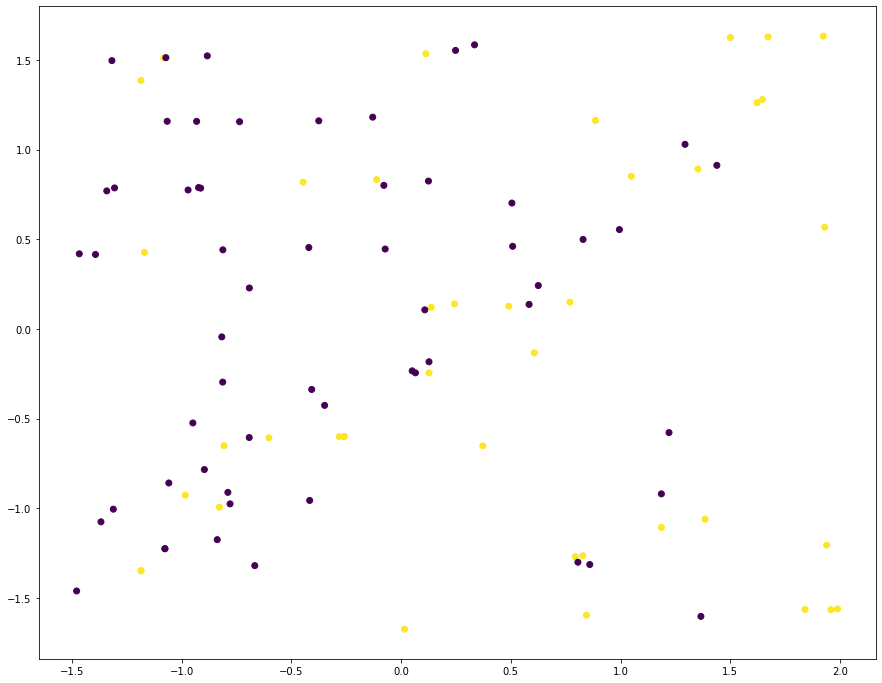

In [33]:
fig,axes =plt.subplots(nrows=1,ncols=1,figsize=(15,12))

plt.scatter(dados_norm.iloc[:,5],dados_norm.iloc[:,6],c=dados_norm.iloc[:,7],alpha=1)

<AxesSubplot:xlabel='Dim2', ylabel='Dim3'>

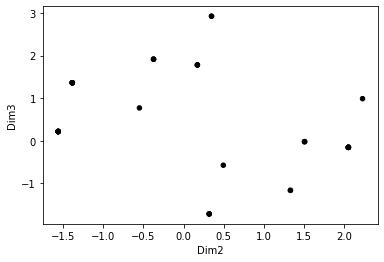

In [35]:
dados_norm.plot.scatter(x=1,y=2,c=kmeans.labels_)

In [30]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(dados_norm)
 
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = dados_norm[dados_norm.Labels == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
#filter rows of original data
filtered_label2 = dados_norm[dados_norm.Labels == 0]
 
filtered_label8 = dados_norm[dados_norm.Labels == 1]


plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'black')
plt.show()

In [ ]:
dados_norm

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(dados_norm.iloc[:,0:7])
pca=pca.fit_transform(dados_norm.iloc[:,0:7])
pca1 = pd.DataFrame(pca[:,0],columns=['x1'])
pca1['x2'] = pca[:,1]
pca1.head(5)

In [ ]:
from sklearn.cluster import KMeans
fitted_ = KMeans(n_clusters=2,max_iter=500).fit(pca1)
pca1['Labels']  = fitted_.labels_
pca1.index = dados.index
pca1

In [ ]:
fig,axes =plt.subplots(nrows=1,ncols=1,figsize=(15,12))

plt.scatter(pca1.iloc[:,0],pca1.iloc[:,1],c=pca1.iloc[:,2],alpha=1)